# POSTTEST 8 KB

<ul>
    <li> Nama : Denissa Putri Maha Rani
    <li> NIM : 2009106079
    <li> dataset : <a href='https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction'> Heart Failure Prediction
<ul>

## Deep learning
Deep learning merupakan subbidang machine learning yang algoritmatnya terinspirasi dari struktur syaraf manusia.Struktur tersebut dinamakan Artificial Neural Network(ANN).<br>
ANN terdiri dari 3 layer:
<li>Input layer → berisi variabel data input
<li>Hidden layer/processing layer → berisi Langkah pengenalan objek
<li>Output layer → berisi hasil pengenalan suatu objek

### Sequential model
Model yang bekerja dengan membuat tumpukan lapisan/layer dimana setiap layer memiliki input dan output. <br>
tf.keras.Sequential()

### DNN
<li>Membangung layer yang saling terhubung.<br>
tf.keras.layers.Dense() <br>
<li>setelah menyusun layer detail parameter setiap layer yang telah
disusun pada model dapat dilihat dengan : <br>
model.summary()

### Training model
<ol>
    <li> model compile : konfigurasi model
    <li> optimizer : class atau metode yang digunakan untuk mengubah atribut model seperti weight dan learning rate untuk mengurangi loss. yg sering digunakan yaitu adam, RMSprop dan SGD
    <li> Fungsi loss : bertujuan menghitung kuantitas yang harus diminimalkan model dalam training.
    <li> model fit : modeling data training dengan model.fit()
    <li> callback function : fungsi tambahan yang dijalankan saat proses training dan biasanya fungsi ini akan dijalankan ketika proses training memenuhi kondisi tertentu.

### Mdel evaluation

untuk melihat akurasi pada data testing. Evaluasi dilakukan menggunakan input testing set(x) dan target testing set(y)

### Model prediction
Prediksi dilakukan hanya menggunakan input testing set.

### Model saving
Model dapat disimpan dalam bentuk JSON, YAML, atau HDF5

### Model loading
File model yang ada dapat digunakan dengan menggunakan model loading.

In [269]:
#import library yang dibutuhkan
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [272]:
# Baca dataset 
dataset_Diabet = pd.read_csv("diabetes.csv")

In [380]:
# Tampilkan 5 data teratas dari dataset
dataset_Diabet.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [381]:
# Melihat kolom dataframe
dataset_Diabet.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [382]:
# Melihat tipe data pada dataframe
dataset_Diabet.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [383]:
# Split data dengan fungsi dari sklearn
X  = dataset_Diabet[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin', 'BMI','DiabetesPedigreeFunction','Age']]
Y  = dataset_Diabet[['Outcome']]

In [384]:
# Membagi data testing sebanyak 20%
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

In [385]:
# melihat dimensi dari x_train
x_train.shape

(614, 8)

In [386]:
# melihat dimensi dari x_test
x_test.shape

(154, 8)

In [387]:
# Menampilkan nilai unik dari y_test
np.unique(y_test)

array([0, 1], dtype=int64)

In [388]:
num_class = 7
y_train = tf.keras.utils.to_categorical(y_train, num_class)
y_test = tf.keras.utils.to_categorical(y_test, num_class)

In [389]:
x_train = tf.reshape(x_train, [614, 8])
x_test = tf.reshape(x_test, [154, 8])

In [390]:
# Lihat tipe data x_train
x_train.dtype

tf.float64

In [403]:
# Buat model
modelDiabet = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_dim=8),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_class, activation='softmax')
])

In [404]:
modelDiabet.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 32)                288       
                                                                 
 dense_76 (Dense)            (None, 64)                2112      
                                                                 
 dense_77 (Dense)            (None, 7)                 455       
                                                                 
Total params: 2,855
Trainable params: 2,855
Non-trainable params: 0
_________________________________________________________________


In [405]:
# Konfigurasi model
modelDiabet.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [408]:
# Model fit
from matplotlib.pyplot import step

trackModel = modelDiabet.fit(
        x_train, y_train,
        epochs=10, steps_per_epoch=20,
        verbose=2,
        validation_data=(x_test, y_test)
)

Epoch 1/10
20/20 - 0s - loss: 0.6147 - accuracy: 0.6889 - val_loss: 0.5697 - val_accuracy: 0.7143 - 150ms/epoch - 8ms/step
Epoch 2/10
20/20 - 0s - loss: 0.5608 - accuracy: 0.7345 - val_loss: 0.5475 - val_accuracy: 0.7403 - 141ms/epoch - 7ms/step
Epoch 3/10
20/20 - 0s - loss: 0.5755 - accuracy: 0.7248 - val_loss: 0.5819 - val_accuracy: 0.7013 - 139ms/epoch - 7ms/step
Epoch 4/10
20/20 - 0s - loss: 0.5948 - accuracy: 0.7036 - val_loss: 0.6901 - val_accuracy: 0.6169 - 107ms/epoch - 5ms/step
Epoch 5/10
20/20 - 0s - loss: 0.6068 - accuracy: 0.7068 - val_loss: 0.6039 - val_accuracy: 0.6948 - 97ms/epoch - 5ms/step
Epoch 6/10
20/20 - 0s - loss: 0.5838 - accuracy: 0.7199 - val_loss: 0.5892 - val_accuracy: 0.7403 - 79ms/epoch - 4ms/step
Epoch 7/10
20/20 - 0s - loss: 0.5542 - accuracy: 0.7313 - val_loss: 0.6883 - val_accuracy: 0.6364 - 103ms/epoch - 5ms/step
Epoch 8/10
20/20 - 0s - loss: 0.5415 - accuracy: 0.7459 - val_loss: 0.6524 - val_accuracy: 0.6753 - 125ms/epoch - 6ms/step
Epoch 9/10
20/20 -

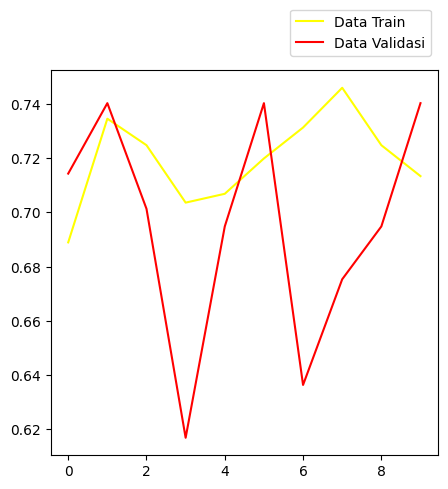

In [410]:
plt.figure(1, figsize=(5,5))
plt.plot(range(len(trackModel.history['accuracy'])),
         trackModel.history['accuracy'],
         color='yellow',
         label='Data Train'
)
plt.plot(range(len(trackModel.history['val_accuracy'])),
         trackModel.history['val_accuracy'],
         color='red',
         label='Data Validasi',
         
)
plt.legend(bbox_to_anchor=(1, 1.02), loc='lower right')
plt.show()